random forest for refined dataset
- imputed with mean value of each column
- eliminate outliers and leverges after normalized

some observations:
- the model contructed by not normalized dataset is as good as the normalized dataset.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
import joblib

import scipy

In [3]:
plt.rcParams["figure.figsize"] = (15, 10)

## load data

In [4]:
pth_data = '../processed_data/train_refine_not_norm_max.csv'
df_refine = pd.read_csv(pth_data)

In [5]:
df_refine

,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp
0,1.77,58.0,-1.0,18.513199,23.0,54.990,91.000000,63.000000,32.682000,0.128582,0.36,1.1,26.157778
1,1.78,73.0,-1.0,23.040020,24.0,56.310,90.000000,81.000000,33.096000,0.079552,0.36,1.0,27.075000
2,1.77,90.0,-1.0,28.727377,28.0,61.459,83.000000,78.000000,30.537000,0.422045,0.57,1.7,26.671111
3,1.60,52.5,1.0,20.507812,24.0,44.681,88.158537,62.485294,32.559814,0.031869,0.61,1.7,25.573889
4,1.60,52.5,1.0,20.507812,24.0,62.764,82.000000,39.000000,30.907000,-0.031865,0.54,1.0,24.702222
5,1.77,90.0,-1.0,28.727377,28.0,61.638,91.000000,83.000000,33.250000,8.697113,0.36,1.1,27.235000
6,1.77,58.0,-1.0,18.513199,23.0,55.272,87.000000,62.485294,32.915000,0.006857,0.36,1.0,26.377778
7,1.77,58.0,-1.0,18.513199,23.0,50.237,99.000000,54.000000,31.588000,0.017909,0.36,1.3,24.847222
8,1.77,90.0,-1.0,28.727377,28.0,60.389,67.000000,62.485294,31.013000,0.188456,0.36,1.1,26.377778
9,1.77,58.0,-1.0,18.513199,23.0,53.132,106.000000,93.000000,33.790000,0.322940,0.36,1.3,27.136111


In [6]:
df_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   height        44 non-null     float64
 1   weight        44 non-null     float64
 2   gender        44 non-null     float64
 3   bmi           44 non-null     float64
 4   age           44 non-null     float64
 5   rh            44 non-null     float64
 6   heart_rate    44 non-null     float64
 7   stress_level  44 non-null     float64
 8   skin_temp     44 non-null     float64
 9   eda           44 non-null     float64
 10  Clo           44 non-null     float64
 11  Act           44 non-null     float64
 12  env_temp      44 non-null     float64
dtypes: float64(13)
memory usage: 4.6 KB


## data process

### X & y

In [7]:
X_data = df_refine[['height', 'weight', 'gender', 'bmi', 'age', 'rh', \
                      'heart_rate', 'stress_level', 'skin_temp', 'eda', \
                      'Clo', 'Act']]

In [8]:
X_cols_name = X_data.columns

In [9]:
y_data = df_refine['env_temp']

### make training data and testing data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1208)

much better than the basic linear regression

## tuning hyperparameter - 5-fold cross validation

### random search
Use the random grid to search for best hyperparameters (approximately)
- 5-fold cross validation

In [11]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]

# Complexity parameter used for Minimal Cost-Complexity Pruning.
# ccp_alpha = [0.00001, 0.0005, 0.0001, 0.0005]
    
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [12]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 4, 8, 16]}

In [13]:
rfr = RandomForestRegressor()

In [14]:
rfr_random = RandomizedSearchCV(estimator=rfr, 
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=5, 
                               verbose=2, 
                               random_state=1208, 
                               n_jobs=-1,
                               scoring='r2')

In [15]:
# Fit the random search model
# Use R^2 as score method
rfr_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1208, scoring='r2', verbose=2)

In [16]:
rfr_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [17]:
rfr_random.best_score_

0.4521582545184216

### Grid Search
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try.

In [18]:
bp = rfr_random.best_params_
ne = bp['n_estimators']
md = bp['max_depth']
md = md if md is not None else 5
param_grid = {
    'n_estimators': [int(ne * 0.8), int(ne * 0.9), ne, int(ne * 1.1), int(ne * 1.2)],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [2, 3, 4, 5],
    'max_depth': [int(md * 0.8), int(md * 0.9), md, int(md * 1.1), int(md * 1.2), None]
}

In [19]:
rfr = RandomForestRegressor()

In [20]:
grid_search = GridSearchCV(estimator = rfr, 
                           param_grid = param_grid, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2,
                           scoring='r2')

In [21]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  6.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [16, 18, 20, 22, 24, None],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [480, 540, 600, 660, 720]},
             scoring='r2', verbose=2)

In [22]:
grid_search.best_params_

{'max_depth': 22,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 480}

In [23]:
grid_search.best_score_

0.4663987119569172

### validate the result

In [24]:
best_params_5 = grid_search.best_params_

In [25]:
rfr = RandomForestRegressor(random_state=1208)

In [26]:
rfr.set_params(**best_params_5)

RandomForestRegressor(max_depth=22, max_features=4, n_estimators=480,
                      random_state=1208)

In [27]:
rfr_cv_mse = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [28]:
rfr_cv_mse

array([-0.2008067 , -1.46849487, -0.82981101, -0.70908391, -0.31141713])

In [29]:
np.abs(rfr_cv_mse.mean())

0.7039227249634725

In [30]:
rfr_cv_r2 = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=5)

In [31]:
rfr_cv_r2

array([ 0.83553375, -0.06169503,  0.24228459,  0.42084046,  0.80349912])

In [32]:
rfr_cv_r2.mean()

0.4480925783510541

In [33]:
rfr_best = RandomForestRegressor(random_state=1208)
rfr_best.set_params(**best_params_5)

RandomForestRegressor(max_depth=22, max_features=4, n_estimators=480,
                      random_state=1208)

In [34]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=22, max_features=4, n_estimators=480,
                      random_state=1208)

### save model

In [35]:
filename = './max_random_forest_model_5.sav'
joblib.dump(rfr_best, filename)

['./max_random_forest_model_5.sav']

## tuning hyperparameter - 7-fold cross validation

### random search
Use the random grid to search for best hyperparameters (approximately)
- 7-fold cross validation

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]

# Complexity parameter used for Minimal Cost-Complexity Pruning.
# ccp_alpha = [0.00001, 0.0005, 0.0001, 0.0005]
    
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [37]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 4, 8, 16]}

In [38]:
rfr = RandomForestRegressor()

In [39]:
rfr_random = RandomizedSearchCV(estimator=rfr, 
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=7, 
                               verbose=2, 
                               random_state=1208, 
                               n_jobs=-1,
                               scoring='r2')

In [40]:
# Fit the random search model
# Use R^2 as score method
rfr_random.fit(X_train, y_train)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  1.9min finished


RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1208, scoring='r2', verbose=2)

In [41]:
rfr_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90}

In [42]:
rfr_random.best_score_

0.5925188541052522

### Grid Search
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try.

In [43]:
bp = rfr_random.best_params_
ne = bp['n_estimators']
md = bp['max_depth']
md = md if md is not None else 5
param_grid = {
    'n_estimators': [int(ne * 0.8), int(ne * 0.9), ne, int(ne * 1.1), int(ne * 1.2)],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [2, 3, 4, 5],
    'max_depth': [int(md * 0.8), int(md * 0.9), md, int(md * 1.1), int(md * 1.2), None]
}

In [44]:
rfr = RandomForestRegressor()

In [45]:
grid_search = GridSearchCV(estimator = rfr, 
                           param_grid = param_grid, 
                           cv = 7, 
                           n_jobs = -1, 
                           verbose = 2,
                           scoring='r2')

In [46]:
grid_search.fit(X_train, y_train)

Fitting 7 folds for each of 1080 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 7560 out of 7560 | elapsed: 28.5min finished


GridSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [72, 81, 90, 99, 108, None],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [800, 900, 1000, 1100, 1200]},
             scoring='r2', verbose=2)

In [47]:
grid_search.best_params_

{'max_depth': 99,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [48]:
grid_search.best_score_

0.6134958875710136

### validate the result

In [49]:
best_params_7 = grid_search.best_params_

In [50]:
rfr = RandomForestRegressor(random_state=1208)

In [51]:
rfr.set_params(**best_params_7)

RandomForestRegressor(max_depth=99, max_features=4, n_estimators=800,
                      random_state=1208)

In [52]:
rfr_cv_mse = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [53]:
rfr_cv_mse

array([-0.20254621, -1.43258509, -0.84187085, -0.73128446, -0.32882693])

In [54]:
np.abs(rfr_cv_mse.mean())

0.7074227061282186

In [55]:
rfr_cv_r2 = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=5)

In [56]:
rfr_cv_r2

array([ 0.83410904, -0.03573291,  0.23127253,  0.40270768,  0.79251373])

In [57]:
rfr_cv_r2.mean()

0.444974015919016

In [58]:
rfr_best = RandomForestRegressor(random_state=1208)
rfr_best.set_params(**best_params_7)

RandomForestRegressor(max_depth=99, max_features=4, n_estimators=800,
                      random_state=1208)

In [59]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=99, max_features=4, n_estimators=800,
                      random_state=1208)

### save model

In [60]:
filename = './max_random_forest_model_7.sav'
joblib.dump(rfr_best, filename)

['./max_random_forest_model_7.sav']

## tuning hyperparameter - 10-fold cross validation

### random search
Use the random grid to search for best hyperparameters (approximately)
- 10-fold cross validation

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]

# Complexity parameter used for Minimal Cost-Complexity Pruning.
# ccp_alpha = [0.00001, 0.0005, 0.0001, 0.0005]
    
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [62]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 4, 8, 16]}

In [63]:
rfr = RandomForestRegressor()

In [64]:
rfr_random = RandomizedSearchCV(estimator=rfr, 
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=10, 
                               verbose=2, 
                               random_state=1208, 
                               n_jobs=-1,
                               scoring='r2')

In [65]:
# Fit the random search model
# Use R^2 as score method
rfr_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.7min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1208, scoring='r2', verbose=2)

In [66]:
rfr_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [67]:
rfr_random.best_score_

-0.2600553004210933

### Grid Search
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try.

In [68]:
bp = rfr_random.best_params_
ne = bp['n_estimators']
md = bp['max_depth']
md = md if md is not None else 5
param_grid = {
    'n_estimators': [int(ne * 0.8), int(ne * 0.9), ne, int(ne * 1.1), int(ne * 1.2)],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [2, 3, 4, 5],
    'max_depth': [int(md * 0.8), int(md * 0.9), md, int(md * 1.1), int(md * 1.2), None]
}

In [69]:
rfr = RandomForestRegressor()

In [70]:
grid_search = GridSearchCV(estimator = rfr, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2,
                           scoring='r2')

In [71]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12, None],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1120, 1260, 1400, 1540, 1680]},
             scoring='r2', verbose=2)

In [72]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1120}

In [73]:
grid_search.best_score_

-0.2598944732877846

### validate the result

In [74]:
best_params_10 = grid_search.best_params_

In [75]:
rfr = RandomForestRegressor(random_state=1208)

In [76]:
rfr.set_params(**best_params_10)

RandomForestRegressor(max_features=2, n_estimators=1120, random_state=1208)

In [77]:
rfr_cv_mse = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [78]:
rfr_cv_mse

array([-0.22041121, -1.74276448, -0.77126386, -0.7987383 , -0.31131181])

In [79]:
np.abs(rfr_cv_mse.mean())

0.7688979300616839

In [80]:
rfr_cv_r2 = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=5)

In [81]:
rfr_cv_r2

array([ 0.81947711, -0.25998695,  0.29574505,  0.34761331,  0.80356558])

In [82]:
rfr_cv_r2.mean()

0.40128281997523063

In [83]:
rfr_best = RandomForestRegressor(random_state=1208)
rfr_best.set_params(**best_params_10)

RandomForestRegressor(max_features=2, n_estimators=1120, random_state=1208)

In [84]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_features=2, n_estimators=1120, random_state=1208)

### save model

In [85]:
filename = './max_random_forest_model_10.sav'
joblib.dump(rfr_best, filename)

['./max_random_forest_model_10.sav']

## final model

In [86]:
best_params = grid_search.best_params_

In [87]:
rfr_best = RandomForestRegressor(random_state=1208)
rfr_best.set_params(**best_params)

RandomForestRegressor(max_features=2, n_estimators=1120, random_state=1208)

In [88]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_features=2, n_estimators=1120, random_state=1208)

### save model

In [89]:
filename = './max_random_forest_model.sav'
joblib.dump(rfr_best, filename)

['./max_random_forest_model.sav']

## visualization
pick a tree from the forest to visualize

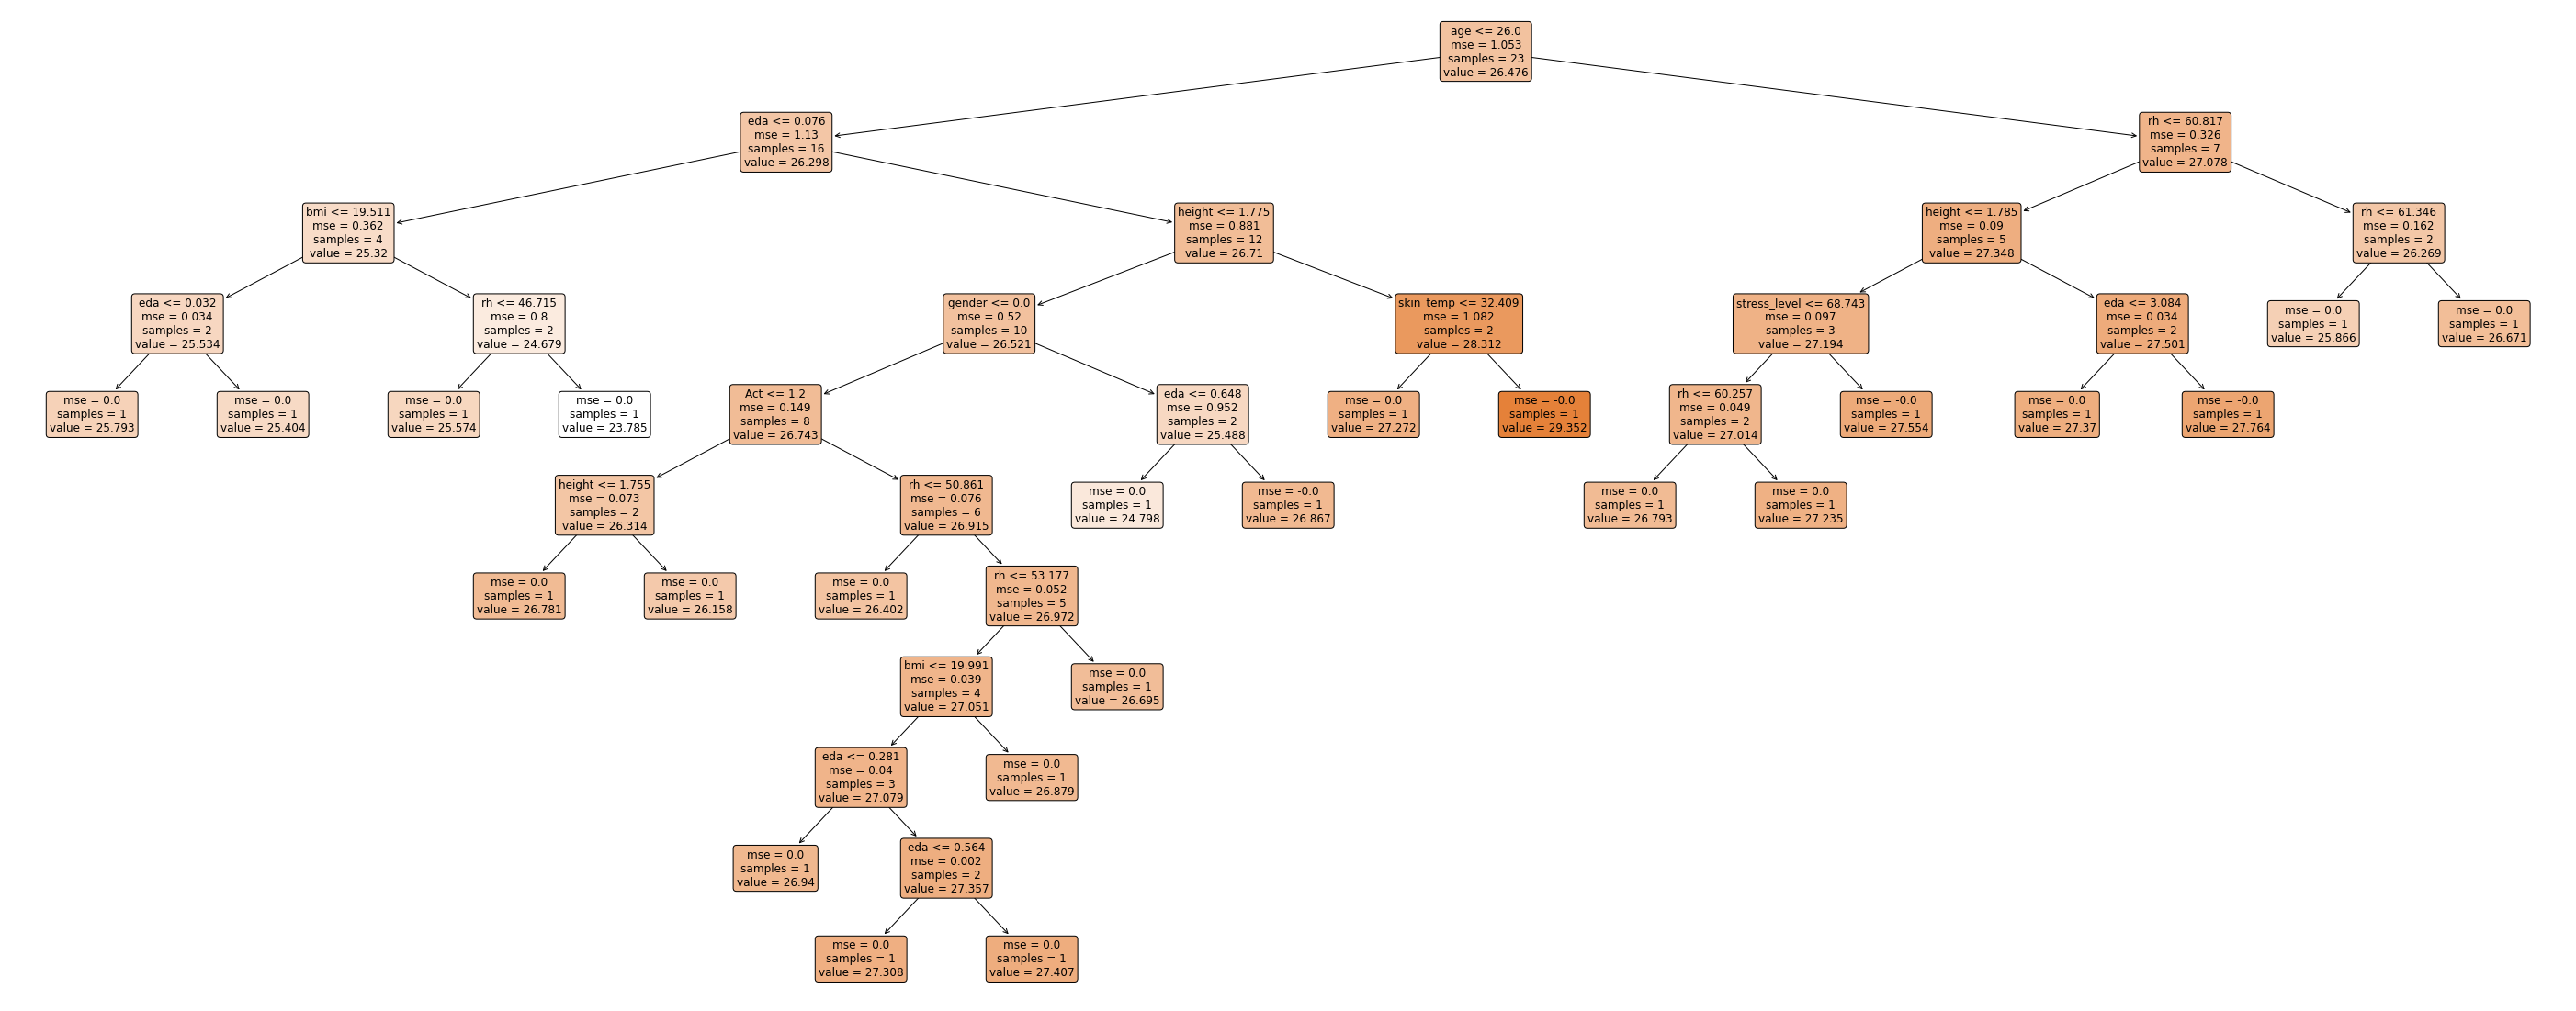

In [90]:
plt.rcParams["figure.figsize"] = (50, 20)
a_tree = tree.plot_tree(rfr_best.estimators_[0], 
                        feature_names=X_data.columns, 
                        rounded=True,
                        filled=True,
                        fontsize=12)

## test

In [91]:
y_pred_test = rfr_best.predict(X_test)

In [92]:
y_pred_test

array([26.50987897, 27.06311657, 26.22809077, 27.11436954, 26.8311131 ,
       24.91902381, 26.35058681, 26.97459276, 26.28780556])

In [93]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

,Actual,Predicted
37,26.377778,26.509879
41,27.172778,27.063117
12,25.913889,26.228091
5,27.235000,27.114370
43,26.817778,26.831113
26,22.608889,24.919024
6,26.377778,26.350587
8,26.377778,26.974593
7,24.847222,26.287806


In [94]:
# mean squared error
mean_squared_error(y_test, y_pred_test)

0.8790955365643042

In [95]:
# R2 score
r2_score(y_test, y_pred_test)

0.5297646981363224

## save test dataset

In [96]:
test_df = X_test.copy()

In [97]:
test_df['env_temp'] = 0

In [98]:
test_df['env_temp'] = y_test

In [99]:
test_df.to_csv('../processed_data/test_max.csv')

In [100]:
test_df

,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp
37,1.77,58.0,-1.0,18.513199,23.0,53.124,92.500000,67.000000,32.682000,0.077406,0.36,1.3,26.377778
41,1.74,65.0,-1.0,21.469150,23.0,46.390,68.000000,62.485294,33.044000,0.223055,0.31,1.8,27.172778
12,1.77,58.0,-1.0,18.513199,23.0,52.903,86.000000,46.000000,31.719000,0.066685,0.36,1.3,25.913889
5,1.77,90.0,-1.0,28.727377,28.0,61.638,91.000000,83.000000,33.250000,8.697113,0.36,1.1,27.235000
43,1.77,58.0,-1.0,18.513199,23.0,51.234,102.500000,78.000000,33.636000,0.585949,0.36,1.3,26.817778
26,1.60,52.5,1.0,20.507812,24.0,51.538,88.158537,62.485294,32.559814,-0.100261,0.53,1.0,22.608889
6,1.77,58.0,-1.0,18.513199,23.0,55.272,87.000000,62.485294,32.915000,0.006857,0.36,1.0,26.377778
8,1.77,90.0,-1.0,28.727377,28.0,60.389,67.000000,62.485294,31.013000,0.188456,0.36,1.1,26.377778
7,1.77,58.0,-1.0,18.513199,23.0,50.237,99.000000,54.000000,31.588000,0.017909,0.36,1.3,24.847222
